LeverAUC & HLAUC = 62%acc and AUC-ROC 57
--- LeverZmax & HLZmax = 64%acc and AUC-ROC 66


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler


In [180]:
behav = pd.read_csv('C:/Users/Wonn/Documents/GitHub/ML-For-Beginners/Photometry/data/300behavior.csv')

# Assuming behav is your DataFrame and it's already imported
# Replace all occurrences of 3 with 2 in the 'NextLever' column
removeOmits = behav[behav['NextLever'] != 0]


In [181]:
removeOmits['NextLever'] = removeOmits['NextLever'].replace(1, 0)
removeOmits['NextLever'] = removeOmits['NextLever'].replace(3, 1)
removeOmits['NextLever'] = removeOmits['NextLever'].replace(2, 1)

ex29 = removeOmits[removeOmits['ID'] != 29]

df = ex29[(ex29['Trial#'] > 20) & ~(ex29['Trial#'].isin([40, 60]))]

df.head

C:\Users\Wonn\AppData\Local\Temp\ipykernel_7612\1309180539.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  removeOmits['NextLever'] = removeOmits['NextLever'].replace(1, 0)
C:\Users\Wonn\AppData\Local\Temp\ipykernel_7612\1309180539.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  removeOmits['NextLever'] = removeOmits['NextLever'].replace(3, 1)
C:\Users\Wonn\AppData\Local\Temp\ipykernel_7612\1309180539.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

<bound method NDFrame.head of       ID    Date  Trial#  Lever  NextLever  WSLS  LeverZmax  LeverZmin  \
20    16  230123      21      3          1     1   2.401602  -1.003824   
21    16  230123      22      3          1     1   2.926855  -1.217437   
22    16  230123      23      3          1     1   1.696856  -1.406294   
23    16  230123      24      3          1     1   1.724995  -1.203465   
24    16  230123      25      3          1     1   0.747431  -1.450247   
...   ..     ...     ...    ...        ...   ...        ...        ...   
1668  32  230407      46      2          1     4   2.178934  -2.011815   
1669  32  230407      47      2          0     2   1.441027  -1.541796   
1671  32  230407      50      1          1     0   0.368848  -0.990443   
1672  32  230407      51      3          0     3   3.332265  -1.602789   
1674  32  230407      55      1          1     0   0.637471  -3.201188   

        LeverAUC    HLZmax    HLZmin       HLAUC  
20     80.581480  2.714354 -3.

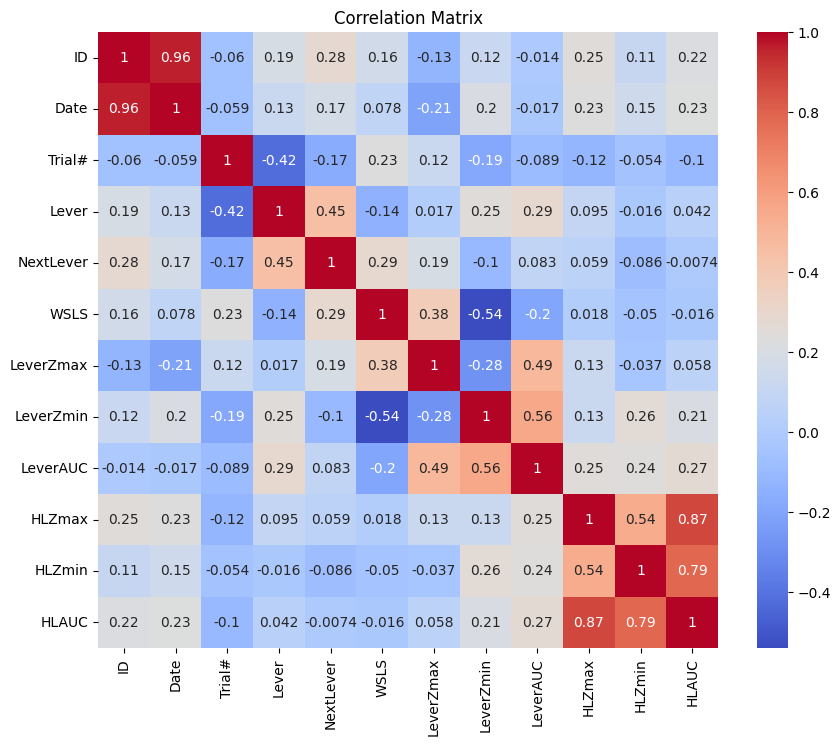

In [182]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split


In [183]:
# Example dataset
# Replace this with your actual dataset
feature_names = ['LeverZmax','LeverZmin','LeverAUC','HLZmax','HLZmin','HLAUC']  # Assuming X is a DataFrame

X = df[feature_names]  # Predictor variables
y = df['NextLever']  # Target variable with three categories

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardizing the features (important for logistic regression models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Applying SMOTE (Synthetic Minority Over-sampling Technique)
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train_scaled, y_train)

# Now, X_train_res and y_train_res are the resampled data
# Create a multinomial logistic regression model
# 'multinomial' specifies that the target variable has more than two classes
# 'lbfgs' is an optimization algorithm suitable for multinomial logistic regression
model = LogisticRegression(solver='lbfgs',class_weight='balanced',max_iter=1000)

# Fit the model on the training data
model.fit(X_train_res, y_train_res)

# Predict on the testing data
y_pred = model.predict(X_test_scaled)

# Evaluating the model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.25      0.78      0.38        32
           1       0.95      0.63      0.76       205

    accuracy                           0.65       237
   macro avg       0.60      0.71      0.57       237
weighted avg       0.85      0.65      0.71       237

Confusion Matrix:
 [[ 25   7]
 [ 75 130]]


In [184]:
# Extracting the coefficients
coefficients = model.coef_

# Displaying the coefficients
print("Coefficients matrix:\n", coefficients)


for class_index in range(coefficients.shape[0]):
    print(f"Class {class_index}:")
    for feature_index in range(coefficients.shape[1]):
        print(f"  {feature_names[feature_index]}: {coefficients[class_index, feature_index]}")
    print()


Coefficients matrix:
 [[ 0.73302798 -0.9103187   0.30372777  0.42091639 -0.17203036 -0.29621342]]
Class 0:
  LeverZmax: 0.7330279784748666
  LeverZmin: -0.9103187033346528
  LeverAUC: 0.30372777039162147
  HLZmax: 0.4209163894683061
  HLZmin: -0.17203036213273348
  HLAUC: -0.296213418399187



In [185]:
import statsmodels.api as sm
import pandas as pd

# Ensure y_train_res is a Pandas Series and X_train_res is a DataFrame
y_train_res = pd.Series(y_train_res)
X_train_res = pd.DataFrame(X_train_res)

# Check for consistent dimensions
assert len(y_train_res) == len(X_train_res), "The dimensions of X and y do not match."

# Add a constant to the input features
X_stat = sm.add_constant(X_train_res)

# Fit the binary logistic regression model
model_stat = sm.Logit(y_train_res, X_stat)

# Fitting the model and printing the summary
result_stat = model_stat.fit()
print(result_stat.summary())



Optimization terminated successfully.
         Current function value: 0.602330
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              NextLever   No. Observations:                  946
Model:                          Logit   Df Residuals:                      939
Method:                           MLE   Df Model:                            6
Date:                Tue, 02 Jan 2024   Pseudo R-squ.:                  0.1310
Time:                        21:30:23   Log-Likelihood:                -569.80
converged:                       True   LL-Null:                       -655.72
Covariance Type:            nonrobust   LLR p-value:                 1.843e-34
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4828      0.098      4.949      0.000       0.292       0.674
0              0.7208      0.

In [186]:
from sklearn.inspection import permutation_importance

# Perform permutation importance
perm_importance = permutation_importance(model, X_test_scaled, y_test)

# Summarize in a DataFrame
perm_importance_df = pd.DataFrame({'feature': feature_names, 'importance': perm_importance.importances_mean})
perm_importance_df = perm_importance_df.sort_values(by='importance', ascending=False)

print(perm_importance_df)


     feature  importance
4     HLZmin    0.044726
3     HLZmax    0.038819
2   LeverAUC    0.038819
1  LeverZmin    0.024473
5      HLAUC    0.023629
0  LeverZmax    0.022785


c:\Users\Wonn\Documents\GitHub\ML-For-Beginners\.venv\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


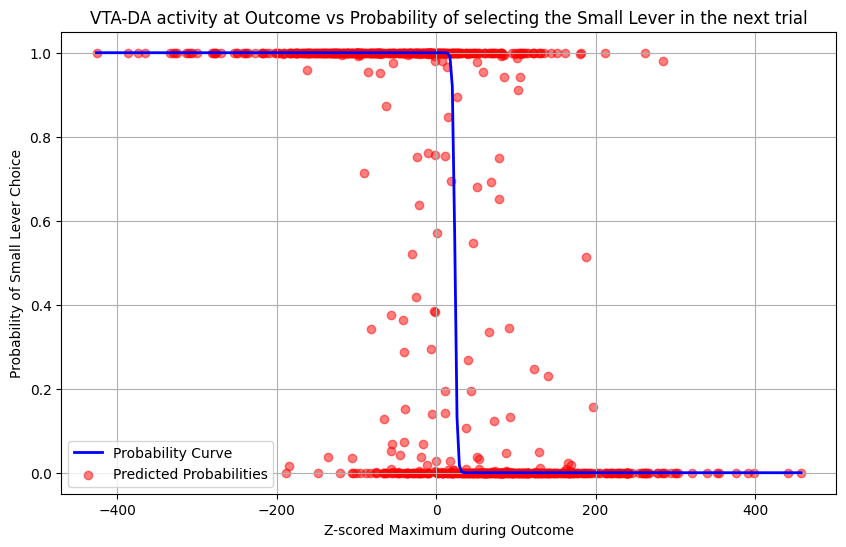

In [187]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df_filtered = df[feature_names]

# Calculate the mean of other features in your dataset
X_mean = df_filtered.drop('LeverAUC', axis=1).mean()

# Generate a range of values for LeverZmax
lever_zmax_range = np.linspace(df_filtered['LeverAUC'].min(), df_filtered['LeverAUC'].max(), 300)
X_pred = np.repeat(X_mean.values.reshape(1, -1), len(lever_zmax_range), axis=0)
X_pred = np.insert(X_pred, 0, lever_zmax_range, axis=1)  # Insert LeverZmax values

# Calculate the predicted probability of NextLever=1 for the curve
prob_next_lever_1_curve = model.predict_proba(X_pred)[:, 0]

# Calculate the predicted probability of NextLever=1 for each data point
X_data_points = df_filtered.copy()
X_data_points['LeverAUC'] = X_data_points['LeverAUC'].astype(float)
prob_next_lever_1_points = model.predict_proba(X_data_points)[:, 0]

# Plotting the probability curve
plt.figure(figsize=(10, 6))
plt.plot(lever_zmax_range, prob_next_lever_1_curve, color='blue', label='Probability Curve', linewidth=2)

# Plotting the individual data points with their predicted probabilities
plt.scatter(df_filtered['LeverAUC'], prob_next_lever_1_points, color='red', label='Predicted Probabilities', alpha=0.5)

plt.title('VTA-DA activity at Outcome vs Probability of selecting the Small Lever in the next trial')
plt.xlabel('Z-scored Maximum during Outcome')
plt.ylabel('Probability of Small Lever Choice')
plt.legend()
plt.grid(True)
plt.show()

c:\Users\Wonn\Documents\GitHub\ML-For-Beginners\.venv\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


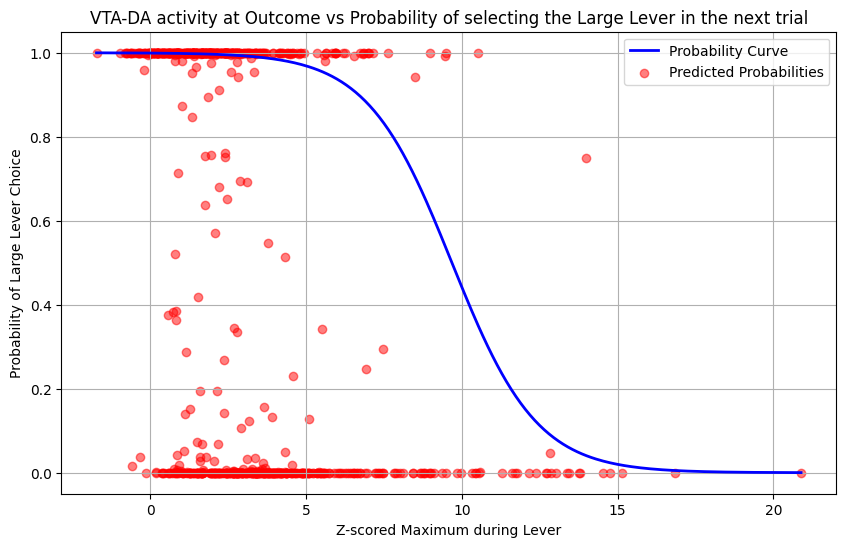

In [189]:

# Calculate the mean of other features in your dataset
X_mean = df_filtered.drop('LeverZmax', axis=1).mean()

# Generate a range of values for LeverZmax
lever_zmax_range = np.linspace(df_filtered['LeverZmax'].min(), df_filtered['LeverZmax'].max(), 300)
X_pred = np.repeat(X_mean.values.reshape(1, -1), len(lever_zmax_range), axis=0)
X_pred = np.insert(X_pred, 0, lever_zmax_range, axis=1)  # Insert LeverZmax values

# Calculate the predicted probability of NextLever=1 for the curve
prob_next_lever_1_curve = model.predict_proba(X_pred)[:, 0]

# Calculate the predicted probability of NextLever=1 for each data point
X_data_points = df_filtered.copy()
X_data_points['LeverZmax'] = X_data_points['LeverZmax'].astype(float)
prob_next_lever_1_points = model.predict_proba(X_data_points)[:, 0]

# Plotting the probability curve
plt.figure(figsize=(10, 6))
plt.plot(lever_zmax_range, prob_next_lever_1_curve, color='blue', label='Probability Curve', linewidth=2)

# Plotting the individual data points with their predicted probabilities
plt.scatter(df_filtered['LeverZmax'], prob_next_lever_1_points, color='red', label='Predicted Probabilities', alpha=0.5)

plt.title('VTA-DA activity at Outcome vs Probability of selecting the Large Lever in the next trial')
plt.xlabel('Z-scored Maximum during Lever')
plt.ylabel('Probability of Large Lever Choice')
plt.legend()
plt.grid(True)
plt.show()

In [190]:
with29 = behav[behav['Lever'] == 1].mean()
without29 = df[df['Lever'] == 1].mean()
print(with29, without29)

ID               20.125000
Date         230197.414062
Trial#           44.664062
Lever             1.000000
NextLever         1.835938
WSLS              0.000000
LeverZmax         1.373147
LeverZmin        -1.695498
LeverAUC        -16.353191
HLZmax            2.194823
HLZmin           -1.260528
HLAUC            45.364922
dtype: float64 ID               19.063636
Date         230178.654545
Trial#           44.245455
Lever             1.000000
NextLever         0.381818
WSLS              0.000000
LeverZmax         1.303410
LeverZmin        -1.747019
LeverAUC        -22.034998
HLZmax            2.134486
HLZmin           -1.283321
HLAUC            42.258055
dtype: float64


In [191]:
with29 = behav[behav['Lever'] == 2].mean()
without29 = df[df['Lever'] == 2].mean()
print(with29, without29)

ID               25.180851
Date         230275.161702
Trial#           44.300000
Lever             2.000000
NextLever         2.489362
WSLS              3.531915
LeverZmax         4.058067
LeverZmin        -4.398419
LeverAUC        -16.051990
HLZmax            2.432188
HLZmin           -1.359720
HLAUC            48.407449
dtype: float64 ID               24.196203
Date         230239.281646
Trial#           43.094937
Lever             2.000000
NextLever         0.920886
WSLS              3.841772
LeverZmax         4.245738
LeverZmin        -5.041719
LeverAUC        -28.209098
HLZmax            2.520569
HLZmin           -1.368804
HLAUC            50.770962
dtype: float64


In [192]:
with29 = behav[behav['Lever'] == 3].mean()
without29 = df[df['Lever'] == 3].mean()
print(with29, without29)

ID               24.712697
Date         230269.250232
Trial#           21.267841
Lever             3.000000
NextLever         2.998146
WSLS              1.041705
LeverZmax         2.329203
LeverZmin        -1.453667
LeverAUC         42.772658
HLZmax            2.651855
HLZmin           -1.366573
HLAUC            59.918273
dtype: float64 ID               24.022161
Date         230242.880886
Trial#           33.141274
Lever             3.000000
NextLever         0.955679
WSLS              1.088643
LeverZmax         2.616788
LeverZmin        -1.363681
LeverAUC         59.211838
HLZmax            2.621823
HLZmin           -1.354715
HLAUC            55.768649
dtype: float64
